<a href="https://colab.research.google.com/github/wintercameearly/number-plate-classification/blob/master/plate_number_classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os, cv2, itertools
import matplotlib.pyplot as plt 
import PIL
from PIL import Image
from matplotlib import image
from numpy import asarray
from PIL import ImageFile
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
#plate_number_dir =  '/gdrive/My Drive/Plate-Number-Classification/Plate_number/'
#negative_images_dir = '/gdrive/My Drive/Plate-Number-Classification/negative_images/'
plate_number_dir =  '/gdrive/My Drive/MachineLearning/plate_number/'
negative_images_dir = '/gdrive/My Drive/MachineLearning/negative_images/'
ROWS = 64
COLS = 64
CHANNELS = 3

In [ ]:
plate_numbers_images = [plate_number_dir+i for i in os.listdir(plate_number_dir)]
negative_images_images = [negative_images_dir+i for i in os.listdir(negative_images_dir)]

In [ ]:
#def read_image(file_path):
#    img = Image.open(file_path)
#    ImageFile.LOAD_TRUNCATED_IMAGES = True
#    img = img.convert("RGB")
#    img_resized = img.resize((ROWS,COLS))
#    image_resized_array = asarray(img)
#    resized_img = cv2.resize(image_resized_array, (ROWS, COLS), interpolation = cv2.INTER_AREA)
#    return resized_img

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_AREA)
    return resized_img

In [ ]:
def prepare_data(images):
    m = len(images)
    n_x = ROWS*COLS*CHANNELS
    X = np.ndarray((n_x,m), dtype = np.uint8)
    y = np.zeros((1,m))
    print("X.shape is {}".format(X.shape))
    for i,image_file in enumerate(images):

        image = read_image(image_file)
        X[:,i] = np.squeeze(image.reshape((n_x,1)))

        if '-' in image_file.lower():
            y[0,i] = 1

        elif '00' in image_file.lower():
          y[0,i] = 0

          
        if i%100 == 0 :
            print("Proceed {} of {}".format(i, m))
            print(image.shape)

    return X,y

In [ ]:
plate_img, negative_img = prepare_data(plate_numbers_images + negative_images_images)

X.shape is (12288, 100)
Proceed 0 of 100
(64, 64, 3)


In [ ]:
classes = {0: 'Negative_Image',         
          1: 'Plate_Number'}

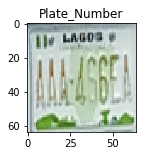

In [ ]:
def show_images(X, y, idx) :
        image = X[idx]
        image = image.reshape((ROWS, COLS, CHANNELS))
        plt.figure(figsize=(4,2))
        plt.imshow(image),
        plt.title(classes[y[idx,0]])
        plt.show()
show_images(plate_img.T, negative_img.T, 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T.ravel()
knn.fit(plate_img_lr, neg_img_lr)

print("Model accuracy: {:.2f}%".format(knn.score(plate_img_lr, neg_img_lr)*100))

Model accuracy: 90.00%


In [ ]:
def show_image_prediction(X, idx, model) :
    image = X[idx].reshape(1,-1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize = (4,2))
    plt.imshow(image)
    plt.title("Test {} : I think this is {}".format(idx, image_class))
    
    plt.show()

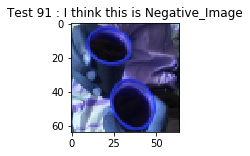

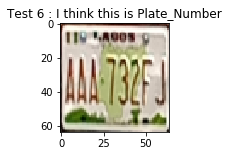

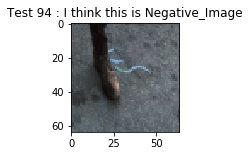

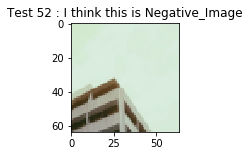

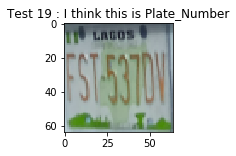

In [ ]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, knn)

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

rnc = RadiusNeighborsClassifier()
rnc.fit(plate_img_lr, neg_img_lr)

print("Model accuracy: {:.2f}%".format(rnc.score(plate_img_lr, neg_img_lr)*100))

Model accuracy: 100.00%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


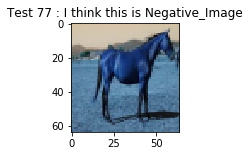

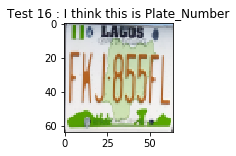

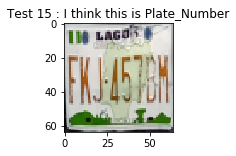

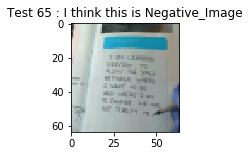

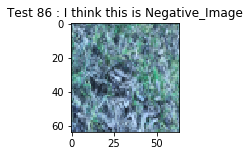

In [ ]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, rnc)